**Exercise 5: Read vehicle plate and crop plate number to img file**

In [13]:
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

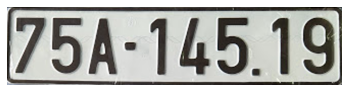

In [14]:
img = cv2.imread('platesample.png')
plt.imshow(img, ); plt.axis("off");

In [15]:
print(img.shape)

(202, 870, 3)


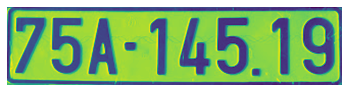

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, ); plt.axis("off");

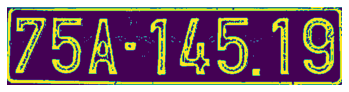

In [17]:
thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,31,10)
plt.imshow(thres, ); plt.axis("off");

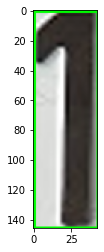

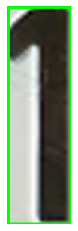

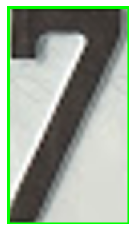

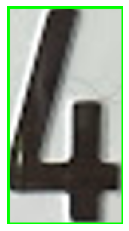

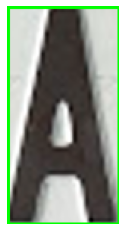

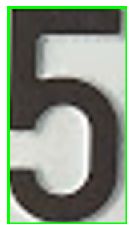

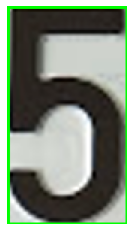

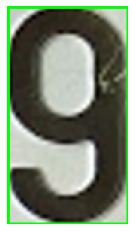

Number of Contours found = 8


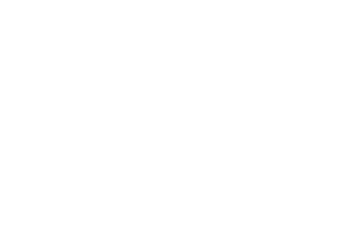

In [18]:

contours = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=False)

# loop over our contours
number = 0
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    #print(x, y, w, h)
    #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # approximate the contour
    if (40<w<90) and(100<h<180) and (h/w>1.5):
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        number +=1
        crop = img[y:y+h,x:x+w]
        plt.imshow(crop); 
        plt.show();plt.axis("off");
        #cv2.imwrite("plate_number{}.png".format(number), crop)

print("Number of Contours found = " + str(number))
#cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
